# Regression Analysis using Linear Algebra - Lab
## Objectives:

* Use linear algebra to apply simple regression modeling.
* Process the data in numpy to get it ready for data modeling.
* Fit a function to data, describing linear mappings between input and output variables.
* Make predictions from the fitted model using previously unseen input features. 
* Evaluate the fitted model by calculating the error between real and predicted values.

## Introduction

In this lab, we shall apply regression analysis using simple matrix manipulations to fit a model to given data, and then predict new values for previously unseen data. We shall follow the approach highlighted in previous lesson where we use numpy to build the appropriate matrices and vectors and solve for the $\beta$ vector. 

The beta vector will be used with test data to make new predictions. We shall also evaluate how good our model fit was. 

First let's import necessary libraries 

In [2]:
import csv # for reading csv file
import numpy as np

## Dataset 

The dataset we will use for this experiment is "Sales Prices in the City of Windsor, Canada".  This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage) etc. and an output (dependent) variable, **price**. We shall formulate a linear algebra problem to find linear mappings from input to out features using the equation provided in the previous lesson. 

This will allow us to find a relationship between house features and house price for the given data, allowing us to find unknown prices for houses, given the input features.  

A description of dataset and included features is available at [THIS LINK](https://rdrr.io/cran/Ecdat/man/Housing.html)

In our dataset, there are 11 input features (first 11 columns):

	lotsize	bedrooms	bathrms	stories	driveway	recroom	fullbase	gashw	airco	garagepl	prefarea

and 1 outfeature i.e. price (12th column). 

## Prepare Data for Modeling 

Let's give you a head start by importing the dataset. We shall perform following steps to get the data ready for analysis:

* Initialize empty lists for input and output features.
* Read the csv file containing complete (raw) data.
* Drop the first row of dataset as it contains the names of variables which won't be used during analysis.
* Create the X matrix (all columns but the last one)
* Append a column of all 1s to the X (bias). 
* Create the y vector which is the last column in the dataset. 


In [32]:
# Create Empty lists for storing X and y values. 
X_raw = []
y_raw = []

#Read the data from the csv file
with open('Housing_new.csv') as f:
    data = csv.reader(f)
    # Drop the very first line as it contains names for columns - not actual data.
    next(data)
    # Read X and y
    for row in data:
        ones = [1.0]
        for r in row[:-1]:
            ones.append(float(r))
        X_raw.append(ones)
        y_raw.append(float(row[-1]))

We shall now calculate the length of X_raw and use this length value to convert all but last 10 elements of X_raw into a numpy array, as the X vector. The left out values will be later used for testing the accuracy of the model.

In [59]:
# Convert all but the last 10 rows of the input data to numpy arrays
length = len(X_raw)-10
X = np.array(X_raw[:length])

Do the same with y_raw and create the y vector (containing all but last 10 values of y_raw)

In [60]:
# Convert all but the last 10 rows of the output data to numpy arrays and transpose
y = np.transpose(np.array([y_raw[:length]]))

## Calculate the `beta` 

With our X and y in place, We can now compute our beta value as:
<center><bold> $\beta$ = (X<sup>T</sup> . X)<sup>-1</sup> . X<sup>T</sup> . y </center> 

using numpy operations (transpose, inverse) that we saw earlier, compute the above equation in steps as required below:

In [35]:
# Calculate Xt.X and Xt.y
Xt = np.transpose(X)
XtX = np.dot(Xt,X)
Xty = np.dot(Xt,y)

In [36]:
# Calculate inverse of Xt.X
XtX_inv = np.linalg.inv(XtX)

In [37]:
# Take the dot product of XtX_inv with Xty to compute beta
beta = XtX_inv.dot(Xty)

In [38]:
# Print the values of computed beta
print(beta)

[[-4.14106096e+03]
 [ 3.55197583e+00]
 [ 1.66328263e+03]
 [ 1.45465644e+04]
 [ 6.77755381e+03]
 [ 6.58750520e+03]
 [ 4.44683380e+03]
 [ 5.60834856e+03]
 [ 1.27979572e+04]
 [ 1.24091640e+04]
 [ 4.19931185e+03]
 [ 9.42215457e+03]]


## Make Predictions
Great , we now have a set of coefficients that describe the linear mappings between X and y. We can now use the calculated beta values  with the last 10 X values that we left out to calculate y predictions. For this we need to perform the following tasks:

* Create X_test and Y_test from last 10 rows of X_raw and y_raw as new numpy arrays


In [39]:
# Create new arrays with last 10 values of raw data
X_test = np.array(X_raw[length:])
y_test = np.array(y_raw[length:])

Now we shall all features in each row in turn and multiply it with the beta computed above. The result will give a prediction for each row which we can append to a new array of predictions.

</br>
<center>
$\hat{y}$ = x.$\beta$ = $\beta$<sub>0</sub> + $\beta$<sub>1</sub> . x<sub>1</sub> + $\beta$<sub>2</sub> . x<sub>2</sub> + .. + $\beta$<sub>m</sub> . x<sub>m</sub>
</center>

* Create new list (y_pred) for saving predictions.
* For each row of X_test, take the dot product of the row with beta to calculate the prediction for that row.
* Append the predictions to y_pred.
* Print the new set of predictions.

In [40]:
# Calculate and print predictions for each row of X_test
y_pred = []
for row in X_test:
    pred = row.dot(beta)
    y_pred.append(pred)
y_pred

[array([97360.65509691]),
 array([71774.16590137]),
 array([92359.0891976]),
 array([77748.27423791]),
 array([91015.59030664]),
 array([97545.11790473]),
 array([97360.65509691]),
 array([106006.80075598]),
 array([92451.69312695]),
 array([73458.2949381])]

## Evaluate Model 
This is exciting, so now our model can use the beta value to predict the price of houses given the input features. Let's plot these predictions against the actual values in y_test to see how much our model deviates. 

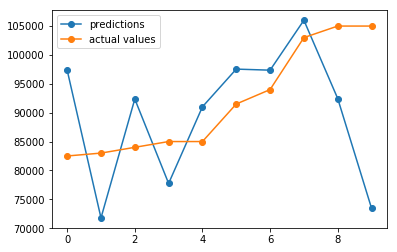

In [63]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
plt.plot(y_pred, linestyle='-', marker='o', label='predictions')
plt.plot(y_test, linestyle='-', marker='o', label='actual values')
plt.legend()
plt.show()

This doesn't look so bad, does it ? Our model, although isn't perfect at this stage, is making a good attempt to predict house prices. The very last prediction seems a bit out. There could a number of reasons for this, which we shall cover in our course in detail. Let's try to dig a bit deeper to check model's predictive abilities by comparing these prediction with actual values of y_test individually. The difference between two vectors will reflect how good (or poor) our model is. 
Perform following steps to achieve this:


* Initialize an empty array `err`.
* for each row in y_test and y_pred, take the **absolute** difference as we are not concerned with +ve and -ve values at this stage.
* Append error for each row in err array. 
* Print err

In [41]:
err = []
for pred,actual in zip(y_pred,y_test):
    diff = abs(pred - actual)
    err.append(diff)
err

[array([14860.65509691]),
 array([11225.83409863]),
 array([8359.0891976]),
 array([7251.72576209]),
 array([6015.59030664]),
 array([6045.11790473]),
 array([3360.65509691]),
 array([3006.80075598]),
 array([12548.30687305]),
 array([31541.7050619])]

So our err array tells us that the predictions have errors ranging from around 3000 , and up to 13,00. Let's take an average of this array to get a better picture with average error. 

In [42]:
# Take the average error
err = np.array(err)
np.average(err)

10421.548015445573

## Conclusion

So there we have it. A predictive model for predicting house prices in a given dataset, with an average error of roughly 10,000 dollars. Remember this is a very naive implementation of regression modeling. The purpose here was to get an introduction to the applications of linear algebra into machine learning and predictive analysis. We still have a number of shortcomings in our modeling approach and we can further apply a number of data modeling techniques to improve this model, as we shall see in following section which is dedicated to regression analysis. 